# Chords, examples

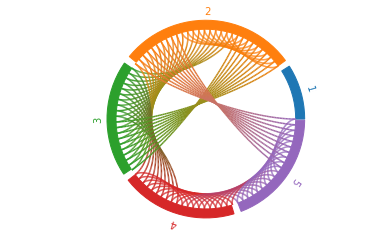

In [2]:
import chordialement
import matplotlib.pyplot as plt
import pandas as pd

index = list(range(100))
categories = [1]*10+[2]*30+[3]*20+[4]*20 + [5]*20
links = (list(range(10))+list(range(20,30)) + list(range(40,70)) + 
              list(range(10,20)) + list(range(70,75)) + list(range(75,100)) + list(range(30,40)))
fig, ax = plt.subplots()
chordialement.chord_diagram(index, links, hue=categories, ax=ax)
plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.path import Path
import matplotlib.patches as patches
import math
import numpy as np
import matplotlib.collections as mcoll
from matplotlib import colors
import pandas as pd

In [54]:
class InvalidInputError(Exception):
    pass

def get_idx_interv(d, D):
    k=0
    while(d>D[k]): 
        k+=1
    return  k-1

def dist (A,B):
    return np.linalg.norm(np.array(A)-np.array(B))

Dist=[0, dist([1,0], 2*[np.sqrt(2)/2]), np.sqrt(2),
      dist([1,0],  [-np.sqrt(2)/2, np.sqrt(2)/2]), 2.0]
params=[1.2, 1.5, 1.8, 2.1]

def deCasteljau(b,t): 
    N=len(b) 
    if(N<2):
        raise InvalidInputError("The  control polygon must have at least two points")
    a=np.copy(b) #shallow copy of the list of control points 
    for r in range(1,N): 
        a[:N-r,:]=(1-t)*a[:N-r,:]+t*a[1:N-r+1,:]                             
    return a[0,:]

def BezierCv(b, nr=5):
    t=np.linspace(0, 1, nr)
    return np.array([[deCasteljau(b, t[k]),deCasteljau(b, t[k+1])] for k in range(nr-1)]) 

def position_circle(x, radius=1):
    return np.array([radius*math.cos(x*2*math.pi), radius*math.sin(x*2*math.pi)])

def linear_gradient(start, end, n=10):
    """ Take color rgb format, and return gradient """
    gradients = np.zeros((3, n))
    for i in range(3):
        gradients[i,:] = np.linspace(start[i], end[i], num=n)
    return np.transpose(gradients)

def linear_gradient_color(c1, c2, n=10):
    return linear_gradient(colors.to_rgba(c1), colors.to_rgba(c2), n=n)

def draw_chord(A, B, ax=None, color_start="b", color_end="r", **kwargs):
    """ Draw a Bezier curve between two points """
    d = dist(A, B)
    K=get_idx_interv(d, Dist)
    b = [A, A/params[K], B/params[K], B]
    bz = BezierCv(b, nr=100)
    lc = mcoll.LineCollection(bz, colors=linear_gradient_color(color_start, color_end, n=100), **kwargs)
    ax.add_collection(lc)
    
def draw_arc_circle(start, end, color="b", ax=None, thickness=0.1, precision=0.01):
    ts = np.arange(start, end, precision)
    poly_nodes = [position_circle(t) for t in ts] + [position_circle(t, radius=1+thickness) for t in ts[::-1]]
    x, y = zip(*poly_nodes)
    ax.fill(x, y, color=color)
    
def add_text_circle(x, txt, radius=1, ax=None, **kwargs):
    ax.text(*position_circle(x, radius=radius),
            txt, rotation=360*x - 90, ha='center', va='center', **kwargs)

In [1]:

df = pd.DataFrame({"idx":index, "categorie":categories, "direction": links})
nb_dots = len(index)
nb_categories = len(set(categories))

order = [1, 2, 3, 4, 5]
df["nb_categorie"] = df.categorie.map(dict(zip(order, range(len(order)))))
df.sort_values(by=["nb_categorie", "idx"], inplace=True)

df["position"] = np.linspace(0, 1, nb_dots)
df["dir_position"] = df.direction.map(df.set_index("idx").position.to_dict())
df["dir_nb_categorie"] = df.direction.map(df.set_index("idx").nb_categorie.to_dict())

cat_to_color = sns.color_palette()

fig, ax = plt.subplots()

start_categorie = df.groupby("nb_categorie").position.min().to_dict()
end_categorie = df.groupby("nb_categorie").position.max().to_dict()
for c, cname in zip(df.nb_categorie.unique(),df.categorie.unique()):
    draw_arc_circle(start_categorie[c], end_categorie[c], 
                    color=cat_to_color[c], ax=ax)
    add_text_circle((start_categorie[c] + end_categorie[c])/2, cname,
                    radius=1.2, ax=ax, color=cat_to_color[c])
    
    
for p1, p2, c1, c2 in df[["position", "dir_position", "nb_categorie", "dir_nb_categorie"]
                        ].itertuples(index=False, name=None):
    if p1 != p2:
        draw_chord(position_circle(p1),
                   position_circle(p2), ax=ax,
                   color_start=cat_to_color[c1],
                   color_end=cat_to_color[c2],
                  linewidth=1)


    
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.axis('equal')
plt.axis('off')
plt.show()

NameError: name 'pd' is not defined

In [26]:


nb_categories = len(categories)
links = np.zeros((nb_categories, nb_categories))

for i, s in enumerate(starts):
    for j, e in enumerate(ends):
        links[i, j] += 1


palette = sns.color_palette()
fig, ax = plt.subplots()
for x in np.linspace(0, 1, nb_dots):
    for y in np.linspace(0, 1, nb_dots):
        A = position_circle(x)
        B = position_circle(y)
        draw_chord(A, B, ax=ax)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.axis('equal')
plt.show()

NameError: name 'starts' is not defined

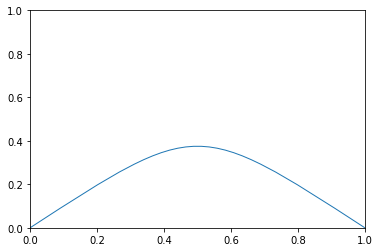

In [15]:
verts = [
    (0., 0.),  # P0
    (0.5, 0.5), # P1
    (0.5, 0.5), # P2
    (1., 0.), # P3
    ]

codes = [Path.MOVETO,
         Path.CURVE4,
         Path.CURVE4,
         Path.CURVE4,
         ]

path = Path(verts, codes)
lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

palette = sns.color_palette()
fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='none', edgecolor=palette[0])
ax.add_patch(patch)
plt.show()

In [58]:
print(Dist)

[0, 0.7653668647301797, 1.4142135623730951, 1.8477590650225735, 2.0]


In [59]:
df = pd.DataFrame({"source":index, "target": links, "cat":"black"})

In [60]:
df

,source,target,cat
0,0,0,black
1,1,1,black
2,2,2,black
3,3,3,black
4,4,4,black
5,5,5,black
6,6,6,black
7,7,7,black
8,8,8,black
9,9,9,black
